In [251]:
#importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn .metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler

In [252]:
# Loading the given dataset as 'credit_df'
credit_df = pd.read_csv("C:/Users/jeffy/Downloads/credit.csv")

In [253]:
credit_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


# Data Preprocessing

In [254]:
credit_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [255]:
# Get the shape of the 'credit_df'
df_shape = credit_df.shape

# Print the number of features and observations
print(f"Number of Features:{df_shape[1]-1}")
print(f"Number of Observations:{df_shape[0]}")

Number of Features:27
Number of Observations:100000


In [256]:
# Displaying information about the 'credit_df'
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [257]:
# Checking missing value
if not credit_df.isna().sum().any():
    print("'credit_df' does not have any null values.")

'credit_df' does not have any null values.


# DUPLICATE VALUES

In [258]:
# Checking duplicate value
if not credit_df.duplicated().any():
    print("'credit_df' does not have any duplicate value.")

'credit_df' does not have any duplicate value.


# OUTLIERS

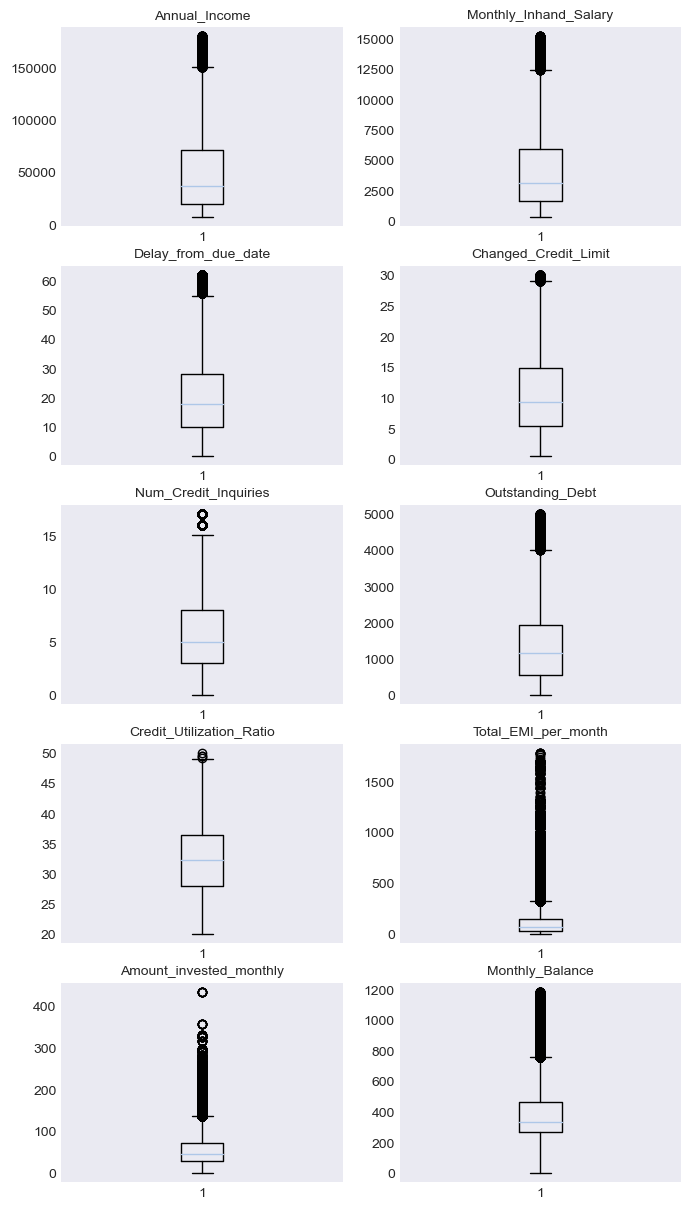

In [259]:
# Define the columns with potential outliers
outlier_columns = ['Annual_Income', 'Monthly_Inhand_Salary',
                   'Delay_from_due_date', 'Changed_Credit_Limit',
                   'Num_Credit_Inquiries', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance',]

# Setting the plot style and figure size
plt.style.use('seaborn-v0_8-dark')
plt.figure(figsize=(8,15))

# Iterate through the outlier columns and create boxplots
for n,i in zip(range(1,11),range(0,10)):
    plt.subplot(5,2,n)
    plt.boxplot(credit_df[outlier_columns[i]])
    plt.title(outlier_columns[i], fontsize=10)

# Display the plot
plt.show()

In [260]:
#function to list out the outlier values
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (upr_bound):
            outliers.append(i)
    return outliers

In [261]:
#outliers with median value
for feature in outlier_columns:
    outliers = detect_outliers_iqr(credit_df[feature])
    impute_value = credit_df[feature].median()
    filter = credit_df[feature] >= np.min(outliers)
    credit_df.loc[filter,feature] = impute_value

In [262]:
# Drop Irrelevant features which only redundant identification
credit_df.drop(['Name','ID','Customer_ID','SSN'],axis=1, inplace=True)

# EDA

In [263]:
credit_cal=credit_df.select_dtypes(include='object')
credit_num=credit_df.select_dtypes(include='number')

In [264]:
credit_cal.describe().T

,count,unique,top,freq
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28616
Credit_Score,100000,3,Standard,53174


In [265]:
for cat_col in credit_cal:
    print(credit_cal[cat_col].value_counts())
    print('\n-------------')
     

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

-------------
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                         

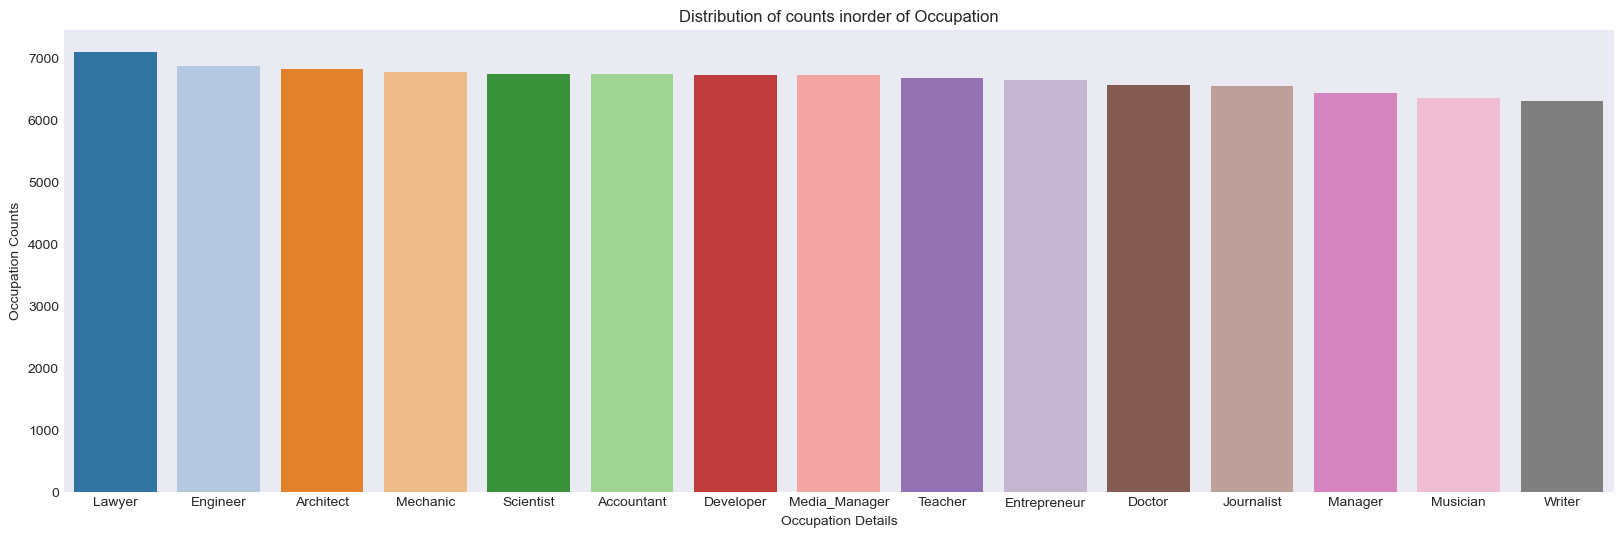

In [266]:
#occupation
plt.figure(figsize=(20,6))
ax=sns.countplot(x='Occupation',data=credit_cal,order=credit_df['Occupation'].value_counts().index)
plt.title('Distribution of counts inorder of Occupation')
plt.xlabel('Occupation Details')
plt.ylabel("Occupation Counts")
plt.show()

Occupation count is shown in ascending order.Lawyer comes first in category occupation

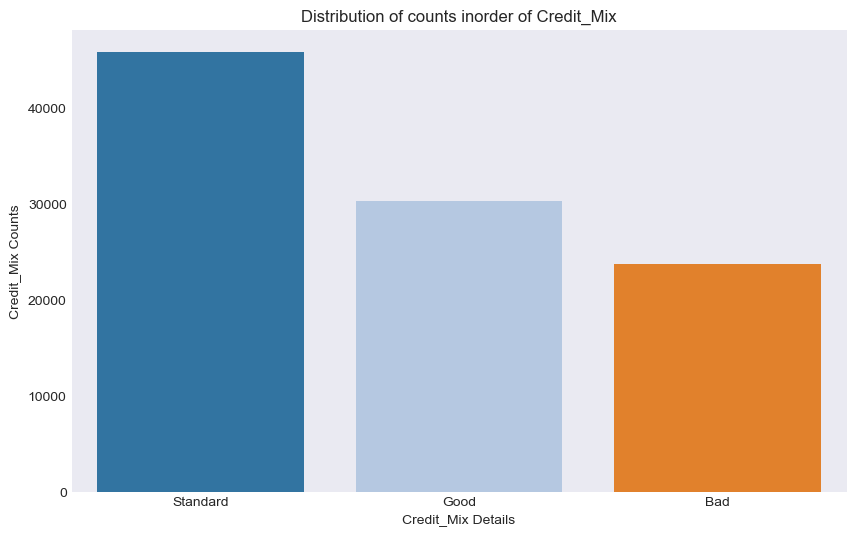

In [267]:
#credit mix
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Credit_Mix',data=credit_cal,order=credit_df['Credit_Mix'].value_counts().index)
plt.title('Distribution of counts inorder of Credit_Mix')
plt.xlabel('Credit_Mix Details')
plt.ylabel("Credit_Mix Counts")
plt.show()

Standard category have majority.

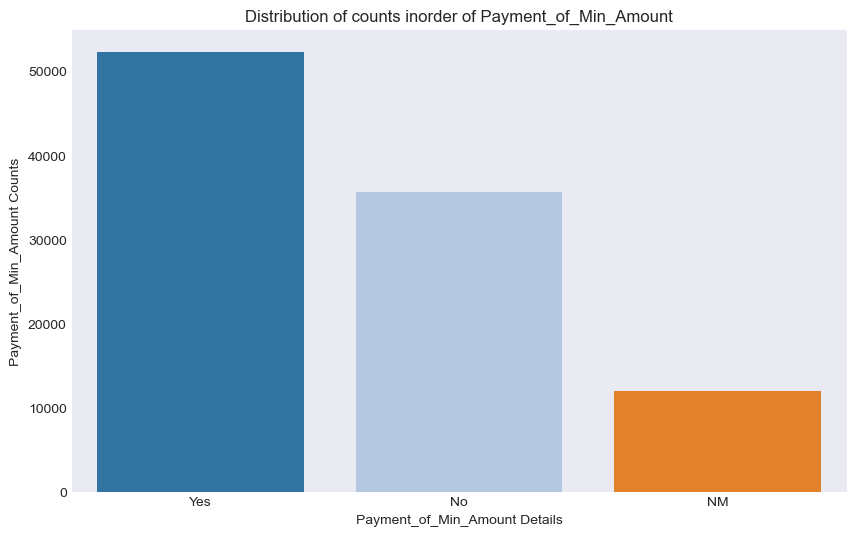

In [268]:
#Payment_of_Min_Amount
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Payment_of_Min_Amount',data=credit_cal,order=credit_df['Payment_of_Min_Amount'].value_counts().index)
plt.title('Distribution of counts inorder of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount Details')
plt.ylabel("Payment_of_Min_Amount Counts")
plt.show()

In payment_of_min_amount 'YES' is above 50000.'NO' is between 40000 and 30000

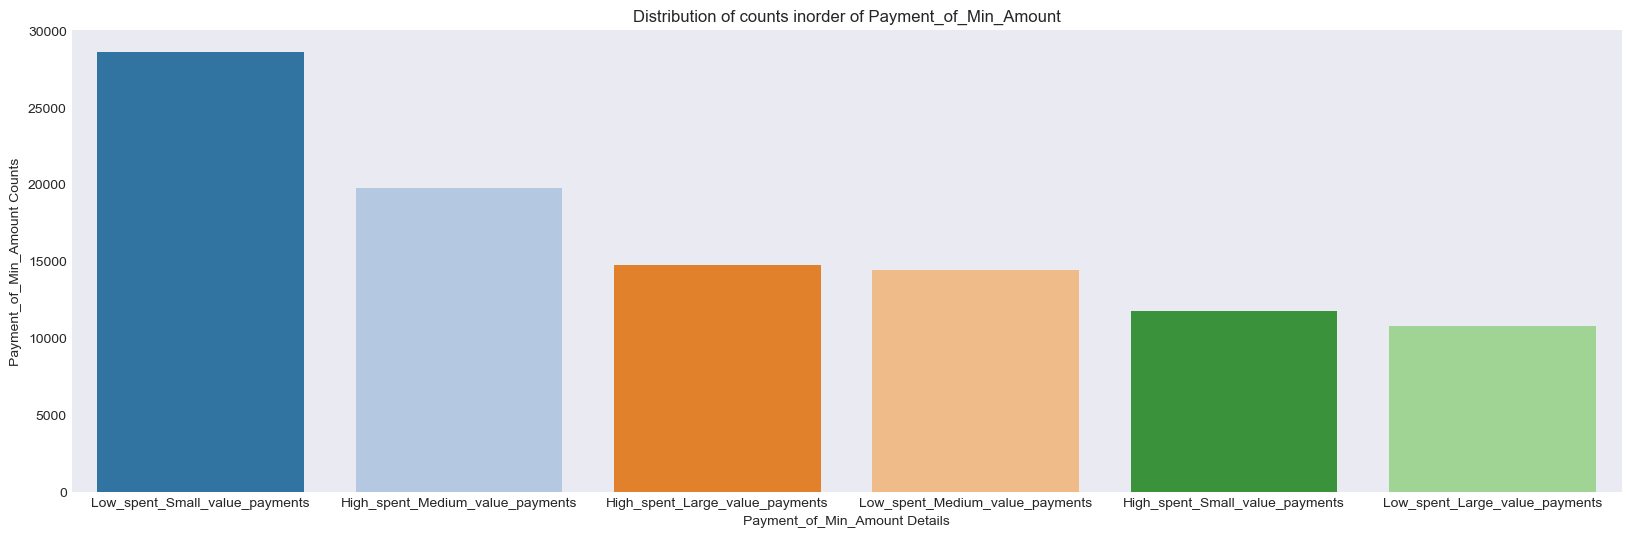

In [269]:
#Payment_Behaviour
plt.figure(figsize=(20,6))
ax=sns.countplot(x='Payment_Behaviour',data=credit_cal,order=credit_df['Payment_Behaviour'].value_counts().index)
plt.title('Distribution of counts inorder of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount Details')
plt.ylabel("Payment_of_Min_Amount Counts")
plt.show()

here shows the payment behaviour in ascending order .Low_spent_small_value_payment is highest and low_spent_large_value_payments

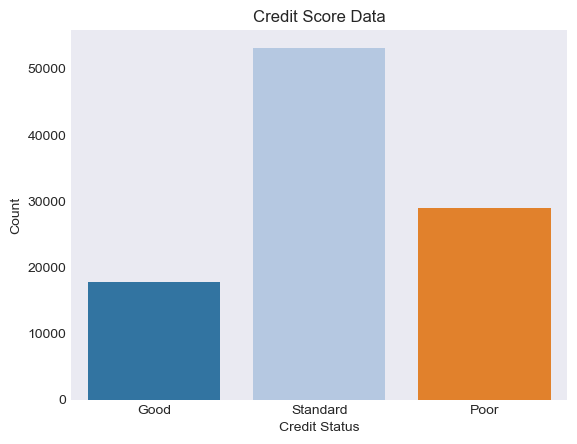

In [270]:
ax = sns.countplot(x = 'Credit_Score',data = credit_df)
plt.title('Credit Score Data')
plt.xlabel('Credit Status')
plt.ylabel('Count')
plt.show()

standard is the highest in credit status and good is the lowest

In [271]:
credit_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,100000.0,4.500000,2.291299e+00,1.000000,2.750000,4.500000,6.250000,8.000000
Age,100000.0,33.316340,1.076481e+01,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,36999.705000,4.872006e-08,36999.705000,36999.705000,36999.705000,36999.705000,36999.705000
Monthly_Inhand_Salary,100000.0,3095.905000,2.850371e-09,3095.905000,3095.905000,3095.905000,3095.905000,3095.905000
Num_Bank_Accounts,100000.0,5.368820,2.593314e+00,0.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,100000.0,5.533570,2.067098e+00,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330e+00,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356e+00,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,18.000000,0.000000e+00,18.000000,18.000000,18.000000,18.000000,18.000000
Num_of_Delayed_Payment,100000.0,13.313120,6.237166e+00,0.000000,9.000000,14.000000,18.000000,25.000000


In [272]:
corr_format= credit_num.corr()
corr_format

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Month,1.000000e+00,0.016990,NaN,NaN,0.000079,0.000090,6.790115e-18,1.555542e-16,NaN,0.000115,NaN,NaN,NaN,NaN,0.022784,NaN,NaN,NaN
Age,1.698955e-02,1.000000,NaN,NaN,-0.190415,-0.148567,-2.175571e-01,-2.135330e-01,NaN,-0.184264,NaN,NaN,NaN,NaN,0.234618,NaN,NaN,NaN
Annual_Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Bank_Accounts,7.909795e-05,-0.190415,NaN,NaN,1.000000,0.442694,5.843015e-01,4.724831e-01,NaN,0.601842,NaN,NaN,NaN,NaN,-0.485331,NaN,NaN,NaN
Num_Credit_Card,8.973261e-05,-0.148567,NaN,NaN,0.442694,1.000000,4.979115e-01,4.179595e-01,NaN,0.423300,NaN,NaN,NaN,NaN,-0.417205,NaN,NaN,NaN
Interest_Rate,6.790115e-18,-0.217557,NaN,NaN,0.584302,0.497912,1.000000e+00,5.591562e-01,NaN,0.571457,NaN,NaN,NaN,NaN,-0.576230,NaN,NaN,NaN
Num_of_Loan,1.555542e-16,-0.213533,NaN,NaN,0.472483,0.417960,5.591562e-01,1.000000e+00,NaN,0.473919,NaN,NaN,NaN,NaN,-0.605727,NaN,NaN,NaN
Delay_from_due_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_of_Delayed_Payment,1.154567e-04,-0.184264,NaN,NaN,0.601842,0.423300,5.714569e-01,4.739186e-01,NaN,1.000000,NaN,NaN,NaN,NaN,-0.481965,NaN,NaN,NaN


# Heat Map

Checking Collinearity

Analyzing the collinearity of categorical values is a challenging approach, but it may still be possible to identify some patterns.

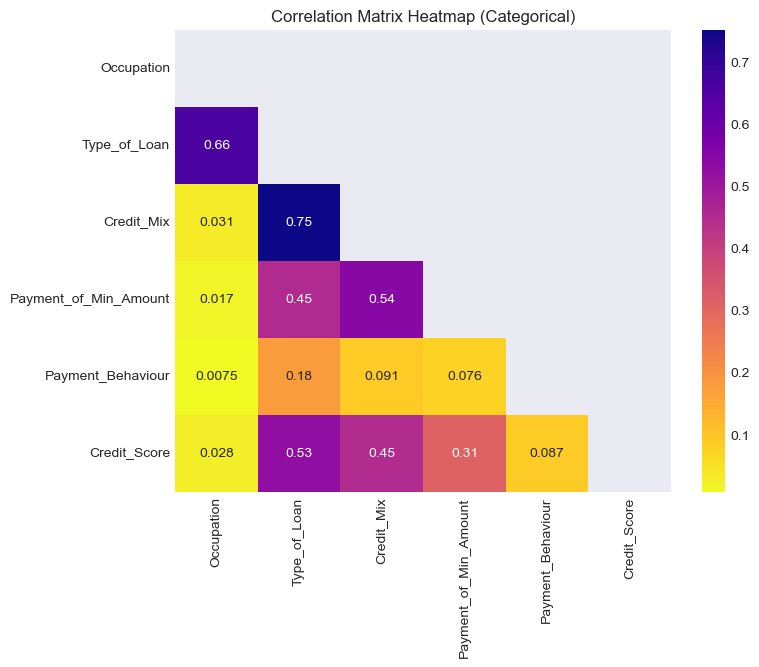

In [273]:
#sns.heatmap(corr_format.corr())
# Select categorical columns from the dataset
credit_cat = credit_df[credit_df.select_dtypes(include='object').columns]

# Define Cramer's function to convert categorical values to numerical values
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for each pair of categorical variables
correlation_matrix = pd.DataFrame(index=credit_cat.columns, 
                                  columns=credit_cat.columns)
for i in credit_cat.columns:
    for j in credit_cat.columns:
        correlation_matrix.loc[i, j] = cramers_v(credit_cat[i], credit_cat[j])

# Set the figure size
plt.figure(figsize=(8, 6))

#Create a heatmap for the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
heatmap = sns.heatmap(correlation_matrix.astype(float),
                      cmap='plasma_r', annot=True, mask=mask)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap (Categorical)')

# Display the plot
plt.show()

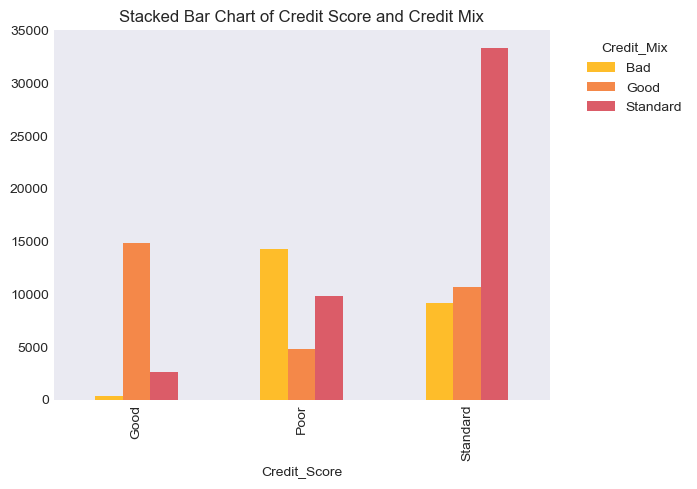

In [274]:
# Set color palette
sns.set_palette("plasma_r")

# Group the data by 'Credit_Score' and 'Credit_Mix', and plot the stacked bar chart
group = ['Credit_Score', 'Credit_Mix']
credit_df.groupby(group).size().unstack().plot.bar()

# Add a legend with a title and adjust the position
plt.legend(title='Credit_Mix', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a title to the plot
plt.title('Stacked Bar Chart of Credit Score and Credit Mix')

# Display the plot
plt.show()

A 'Good' Credit_Score is associated with a majority of 'Good' Credit_Mix, and the same trend follows for both 'Standard' and 'Poor' categories. This indicates that Credit_Score and Credit_Mix have a positive collinear relationship.

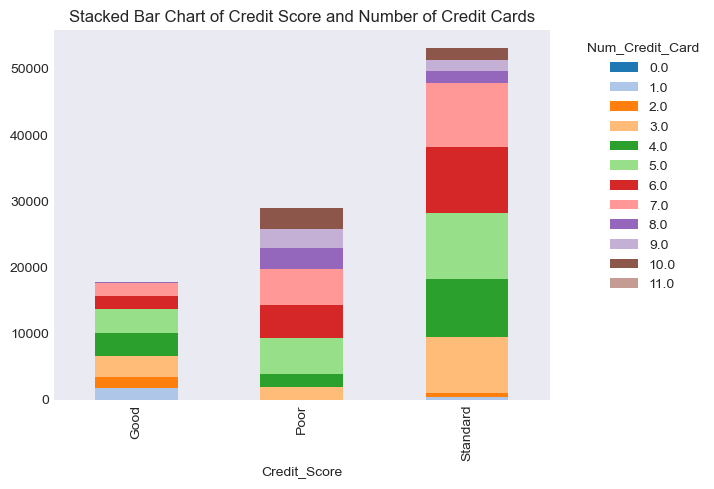

In [275]:
# Set color palette
sns.set_palette("tab20")

# Group the data by 'Credit_Score' and 'Num_Credit_Card', and plot the stacked bar chart
group = ['Credit_Score', 'Num_Credit_Card']
credit_df.groupby(group).size().unstack().plot.bar(stacked=True)

# Add a legend with a title and adjust the position
plt.legend(title='Num_Credit_Card', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a title to the plot
plt.title('Stacked Bar Chart of Credit Score and Number of Credit Cards')

# Display the plot
plt.show()

Customers with one or two credit cards have 'Good' Credit Score.
Customers who have more than two credit cards mostly have a 'Standard' credit score, but some also have a 'Poor' credit score.

# Feature Extraction

In the perspective of the domain-knowledge, Outstanding_Debt is proportional to CUR. So it may be helpful the presence of he proportionality in our dataset.

# #normalization

In [276]:
from sklearn.preprocessing import Normalizer, LabelEncoder


Occupation_en = LabelEncoder().fit_transform(credit_df['Occupation'])
credit_df['Occupation'] = pd.DataFrame(Occupation_en,columns=['Occupation'])



Type_of_Loan_en = LabelEncoder().fit_transform(credit_df['Type_of_Loan'])
credit_df['Type_of_Loan'] = pd.DataFrame(Type_of_Loan_en,columns=['Type_of_Loan'])

Payment_of_Min_Amount_en = LabelEncoder().fit_transform(credit_df['Payment_of_Min_Amount'])
credit_df['Payment_of_Min_Amount'] = pd.DataFrame(Payment_of_Min_Amount_en,columns=['Payment_of_Min_Amount'])

Payment_Behaviour_en = LabelEncoder().fit_transform(credit_df['Payment_Behaviour'])
credit_df['Payment_Behaviour'] = pd.DataFrame(Payment_Behaviour_en,columns=['Payment_Behaviour'])

Credit_Mix_en = LabelEncoder().fit_transform(credit_df['Credit_Mix'])
credit_df['Credit_Mix'] = pd.DataFrame(Credit_Mix_en,columns=['Credit_Mix'])

Credit_Score_en = LabelEncoder().fit_transform(credit_df['Credit_Score'])
credit_df['Credit_Score'] = pd.DataFrame(Credit_Score_en,columns=['Credit_Score'])

# Data Spliting, Encoding

In [277]:
df_train_x = credit_df.drop('Credit_Score',axis = 1)
df_train_y = credit_df['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.3, random_state=42)

In [278]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_samp, y_train_samp = sm.fit_resample(x_train, y_train)
unique, counts = np.unique(y_train_samp, return_counts=True)
print(dict(zip(unique, counts)))

{0: 37301, 1: 37301, 2: 37301}


In [279]:
x_train, x_test, y_train, y_test = train_test_split(x_train_samp, y_train_samp, test_size=0.3, random_state=42)

# Feature Selection

In [280]:


from sklearn.feature_selection import RFE
selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=12)
selector = selector.fit(x_train_samp,y_train_samp)
col = [string for string, flag in zip(x_train_samp.columns, selector.support_) if flag]

[string for string, flag in zip(x_train.columns, selector.support_) if flag]

['Month',
 'Age',
 'Occupation',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount']

# Building the model

In [281]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],['SVC ', SVC()],['KNeighborsClassifier ', KNeighborsClassifier()]]

for name, model in models:
    model = model
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    print(name, accuracy_score(y_test, prediction))

LogisticRegression  0.6372762205474963
DecisionTreeClassifier  0.7950314259330971
RandomForestClassifier  0.8543981412528671
SVC  0.43183104465163386
KNeighborsClassifier  0.8403979625271812


# Hyperparameter tuning and evaluating model with different metrics

In [294]:
model_params = {

    'DecisionTreeClassifier  ': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy']
        }
    },
    'Random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },

    'KNeighborsClassifier' :{
        'model': KNeighborsClassifier(),
        'params': {
        'n_neighbors': [3, 5, 7],
        #'weights': ['uniform', 'distance'],
        #'metric': ['euclidean', 'manhattan']
        }
    }

}

In [295]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
best_metrix = []
best_model = None
best_model_score = -1  # Initialize with a lower score to ensure any model performs better

for model_name, mp in model_params.items():
    # GridSearchCV
    clf_grid = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf_grid.fit(x_train, y_train)

    # Evaluate using different metrics
    y_pred_grid = clf_grid.predict(x_test)
    accuracy_grid = accuracy_score(y_test, y_pred_grid)
    precision_grid = precision_score(y_test, y_pred_grid, average='macro')
    recall_grid = recall_score(y_test, y_pred_grid, average='macro')
    f1_grid = f1_score(y_test, y_pred_grid, average='macro')
    roc_auc_grid = roc_auc_score(y_test, clf_grid.predict_proba(x_test), multi_class='ovr')


    best_metrix.append({
        'model': model_name + ' (GridSearchCV)',
        'accuracy': accuracy_grid,
        'precision': precision_grid,
        'recall': recall_grid,
        'f1-score': f1_grid,
        'roc_auc_score': roc_auc_grid


    })
    # Check if this model performs better than the current best model
    if roc_auc_grid > best_model_score:
        best_model_score = roc_auc_grid
        best_model = clf_grid.best_estimator_

    # RandomizedSearchCV
    clf_random = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, cv=5, return_train_score=False)
    clf_random.fit(x_train, y_train)

    # Evaluate using different metrics
    y_pred_random = clf_random.predict(x_test)
    accuracy_random = accuracy_score(y_test, y_pred_random)
    precision_random = precision_score(y_test, y_pred_random, average='macro')
    recall_random = recall_score(y_test, y_pred_random, average='macro')
    f1_random = f1_score(y_test, y_pred_random, average='macro')
    roc_auc_random = roc_auc_score(y_test, clf_random.predict_proba(x_test), multi_class='ovr')

    best_metrix.append({
        'model': model_name + ' (RandomizedSearchCV)',
        'accuracy': accuracy_random,
        'precision': precision_random,
        'recall': recall_random,
        'f1-score': f1_random,
        'roc_auc_score': roc_auc_random

    })

    # Check if this model performs better than the current best model
    if roc_auc_random > best_model_score:
        best_model_score = roc_auc_random
        best_model = clf_random.best_estimator_


# Print the evaluation results for each model
for model in best_metrix:
    print("Model:", model['model'])
    print("Accuracy:", model['accuracy'])
    print("Precision:", model['precision'])
    print("Recall:", model['recall'])
    print("F1-score:", model['f1-score'])
    print("ROC-AUC Score:", model['roc_auc_score'])
    print("-------------------------------------------")

print("Best model = ",best_model, "best_score = ",  best_model_score)

Model: DecisionTreeClassifier   (GridSearchCV)
Accuracy: 0.7946441869470674
Precision: 0.7939403996484047
Recall: 0.7948087850580356
F1-score: 0.7942950533015182
ROC-AUC Score: 0.8460475224790213
-------------------------------------------
Model: DecisionTreeClassifier   (RandomizedSearchCV)
Accuracy: 0.7944356736468976
Precision: 0.7936761312663551
Recall: 0.7946017157310937
F1-score: 0.7940511274010486
ROC-AUC Score: 0.8458931515195102
-------------------------------------------
Model: Random_forest (GridSearchCV)
Accuracy: 0.8350361919513866
Precision: 0.8350507188034438
Recall: 0.8352438502261251
F1-score: 0.8326674758739832
ROC-AUC Score: 0.9415607038651054
-------------------------------------------
Model: Random_forest (RandomizedSearchCV)
Accuracy: 0.8325638199636591
Precision: 0.8327498595980741
Recall: 0.8327760619522869
F1-score: 0.8298481059434509
ROC-AUC Score: 0.9400592755475282
-------------------------------------------
Model: KNeighborsClassifier (GridSearchCV)
Accurac

# Cross Validation

In [296]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation using the best model
if best_model is not None:
    cv_scores = cross_val_score(best_model, x_train, y_train, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
else:
    print("No best model found.")

Cross-Validation Scores: [0.82051446 0.82989724 0.83371633 0.83173752 0.82426912]
Mean CV Score: 0.8280269320605977


# Feature Importance

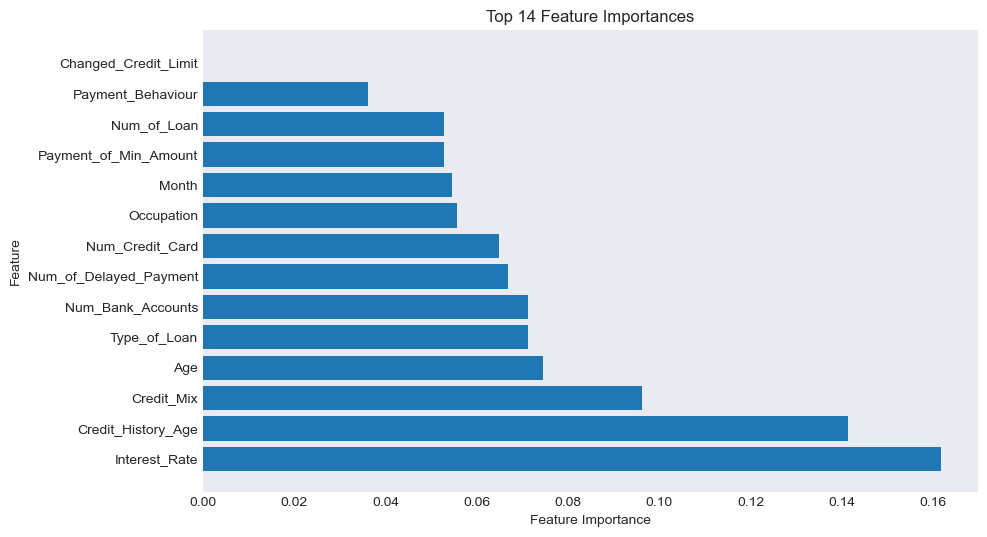

In [298]:
feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_features = x_train.columns[sorted_indices[:14]]
plt.figure(figsize=(10, 6))
plt.barh(range(14), feature_importances[sorted_indices[:14]], align='center')
plt.yticks(range(14), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 14 Feature Importances')
plt.show()

In [299]:
#To Performance Validation
y_pred_test = best_model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Testing Accuracy: 0.8350361919513866
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11113
           1       0.83      0.86      0.85     11254
           2       0.84      0.71      0.77     11204

    accuracy                           0.84     33571
   macro avg       0.84      0.84      0.83     33571
weighted avg       0.84      0.84      0.83     33571



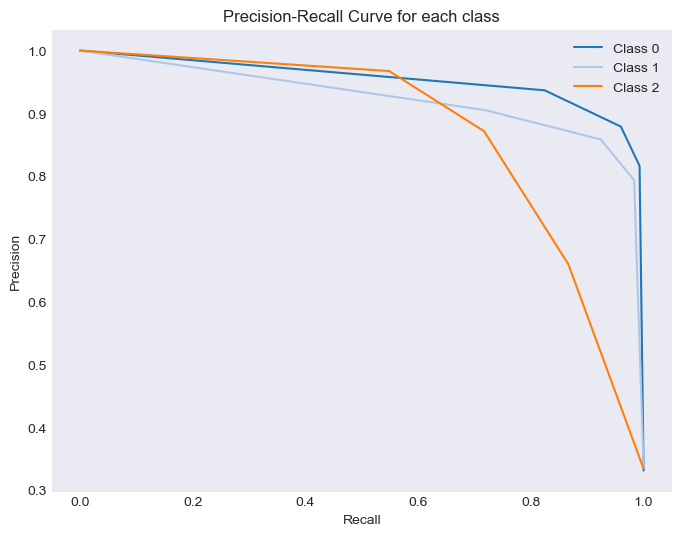

Selected Thresholds: [0.0, 0.0, 0.0]


In [289]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_pred_probs = best_model.predict_proba(x_test)

# Compute precision-recall curve for each class
precisions = []
recalls = []
thresholds = []
for class_idx in range(y_pred_probs.shape[1]):  # Iterate over each class
    precision, recall, threshold = precision_recall_curve(y_test == class_idx, y_pred_probs[:, class_idx])
    precisions.append(precision)
    recalls.append(recall)
    thresholds.append(threshold)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for class_idx in range(y_pred_probs.shape[1]):
    plt.plot(recalls[class_idx], precisions[class_idx], label=f"Class {class_idx}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()


desired_recall_threshold = 2.1  # Set your desired recall threshold here
selected_thresholds = []
for class_idx in range(y_pred_probs.shape[1]):
    # Find the index of the threshold where recall is closest to the desired recall threshold
    idx = np.argmax(recalls[class_idx] >= desired_recall_threshold)
    selected_thresholds.append(thresholds[class_idx][idx])

print("Selected Thresholds:", selected_thresholds)


# Model Deployment

In [300]:
import pickle
X_train_selected = x_train[top_features ]
X_test_selected = x_test[top_features ]
model_rfc = RandomForestClassifier()
#Model Training
model_rfc.fit(X_train_selected, y_train)

#Save the Model
prediction = model_rfc.predict(X_test_selected)
print(best_model, accuracy_score(y_test, prediction))
pickle.dump(model_rfc,open('credit_score_model.pkl','wb'))

RandomForestClassifier(n_estimators=10) 0.8574066902981741
